## Support Vector Machine (SVM)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [6]:
iris = datasets.load_iris()
irispetals = pd.DataFrame(iris["data"][:,(2,3)],columns = ("petallength","petalwidth"))
irispetals["target"] = iris["target"]
irispetals

,petallength,petalwidth,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


/Users/kunaltamhane/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


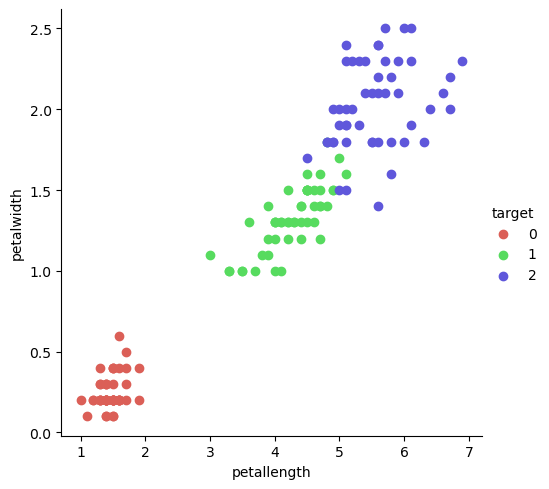

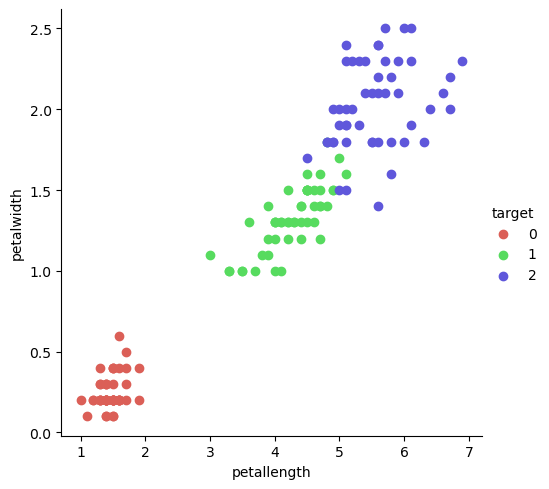

In [21]:
sns.FacetGrid(irispetals, hue="target", palette="hls", size=5).map(plt.scatter, "petallength","petalwidth").add_legend()
plt.show()

In [22]:
X = iris["data"][:,(2,3)] #petal length, petal width
y = (iris["target"]==2).astype(np.float64) # Iris-Virginica
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Create a pipeline with standardScaler and LinearSVC Objects

In [23]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

### Predict

In [25]:
# Test for Iris-Viriginica and Other
print(svm_clf.predict([[5.5,1.7]]))
print(svm_clf.predict([[4.4,1.2]]))
print(svm_clf.predict([[2.1,0.4]]))

[1.]
[0.]
[0.]


## Non linear SVC Classification

In [26]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## Import the Moons Datset

In [27]:
X, y = datasets.make_moons(n_samples=100, noise=0.1)

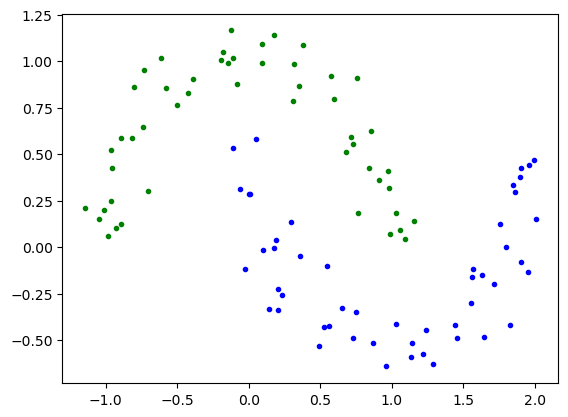

In [28]:
plt.plot(X[:,0][y==1], X[:,1][y==1],"b.")
plt.plot(X[:,0][y==0], X[:,1][y==0],"g.")
plt.show()

In [29]:
y==1

array([False, False, False, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
        True])

## Insert a Polyni=omial Feature of Degree 3 and run the linear SVC

In [30]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [32]:
print(polynomial_svm_clf.predict([[0.5,-0.6]]))
print(polynomial_svm_clf.predict([[0.6,1]]))
print(polynomial_svm_clf.predict([[1.5,0.75]]))
print(polynomial_svm_clf.predict([[0.5,0.5]]))

[1]
[0]
[0]
[0]


## Using the Polynomial Kernel Trick

In [33]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [34]:
print(polynomial_svm_clf.predict([[0.5,-0.6]]))
print(polynomial_svm_clf.predict([[0.6,1]]))
print(polynomial_svm_clf.predict([[1.5,0.75]]))
print(polynomial_svm_clf.predict([[0.5,0.5]]))

[1]
[0]
[0]
[0]
